# <font color =red> <center> datamining credit risk </center> </font>

## <font color =green> Business understanding </font>

Lorsqu'une banque prête de l'argent a une personne elle prend risque que cette dernière ne remboursée pas cet argent dans le délai convenu ce risque est appelé credit risk . alors avant d'octroyer un credit les banques vérifient si le client qui demande un prêt sera capable ou pas de rembourser cette vérification se fait à grace à l'analyse de plusieurs paramètres telque le revenue les biens les depenses actuelle du cleint cette analyse est encore effectuer manuuallement par plusieurs banques .elle est tres consommatrice en temps et en ressources finnancieres.Grace au machine learning il est possible d automisee cette tache et de pouvoir predire avec plus de precision les clients qui seront qui seront on default de parametres

## <font color =green> data understanding </font>

In [1]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import matthews_corrcoef
import pandas as pd
from sklearn.metrics import confusion_matrix

import pickle

import warnings
warnings.filterwarnings('ignore')

### <font color =blue> téléchargement des donnes</font>

In [2]:

df=pd.read_csv('ghiz1.csv')

### <font color =blue> analyse de forme</font>

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,1.0,Urban,Y


In [4]:
 df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 52.9+ KB


In [6]:
df.describe()


,ApplicantIncome,CoapplicantIncome,Credit_History
count,614.000000,614.000000,564.000000
mean,5403.459283,1621.245798,0.842199
std,6109.041673,2926.248369,0.364878
min,150.000000,0.000000,0.000000
25%,2877.500000,0.000000,1.000000
50%,3812.500000,1188.500000,1.000000
75%,5795.000000,2297.250000,1.000000
max,81000.000000,41667.000000,1.000000


In [7]:
df.shape

(614, 11)

In [8]:
# verifier si on a des valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:title={'center':'Comparaison des Sexes'}>

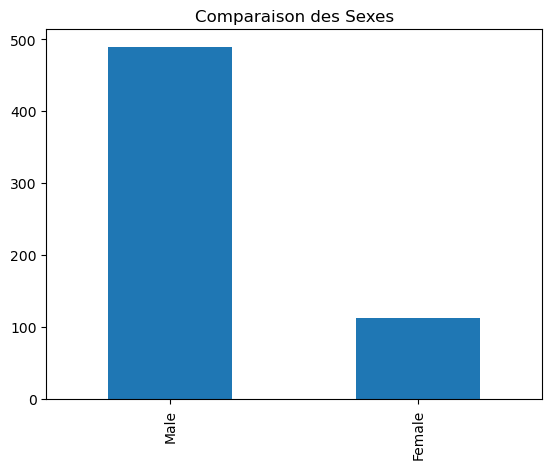

In [9]:
df['Gender'].value_counts().plot.bar(title='Comparaison des Sexes')

<AxesSubplot:title={'center':'la situation familiale'}>

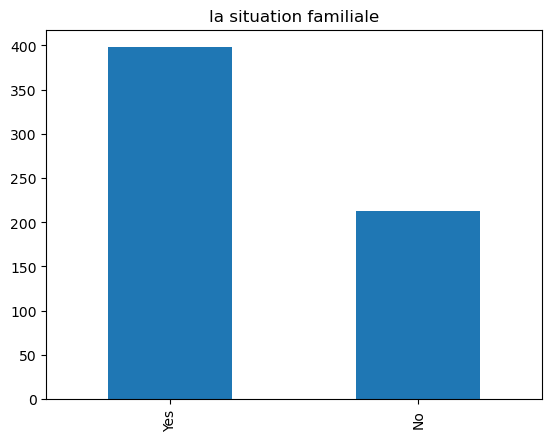

In [10]:
df['Married'].value_counts().plot.bar(title='la situation familiale')

<AxesSubplot:title={'center':'le nombre des enfants '}>

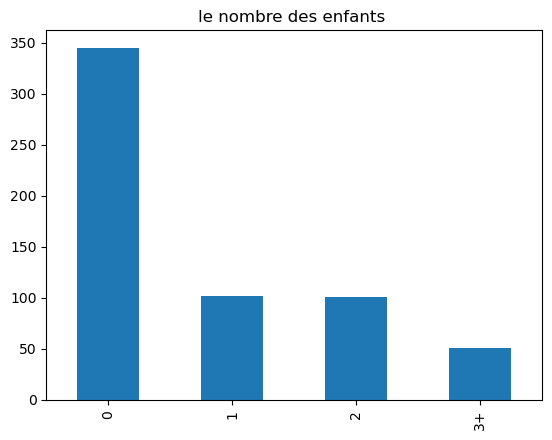

In [11]:

df['Dependents'].value_counts().plot.bar(title='le nombre des enfants ')

<AxesSubplot:title={'center':'Education '}>

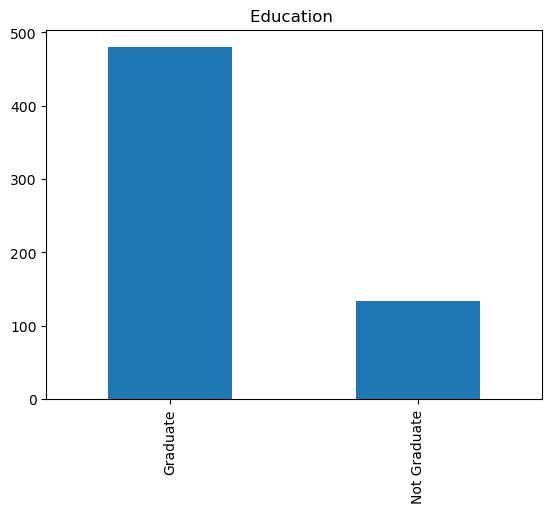

In [12]:
df['Education'].value_counts().plot.bar(title='Education ')

<AxesSubplot:title={'center':'le travail '}>

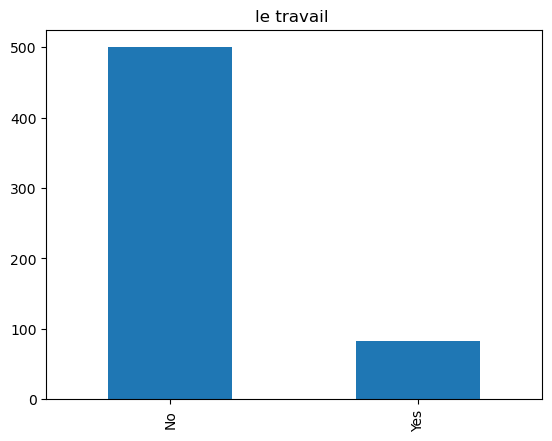

In [13]:
df['Self_Employed'].value_counts().plot.bar(title='le travail ')

<AxesSubplot:title={'center':'Credit_History'}>

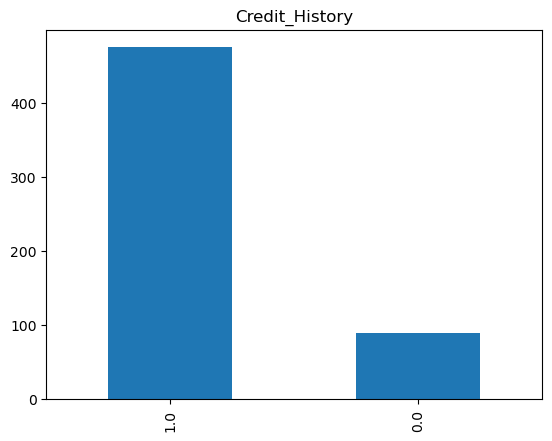

In [14]:
df['Credit_History'].value_counts().plot.bar(title='Credit_History')

<AxesSubplot:title={'center':'Property_Area '}>

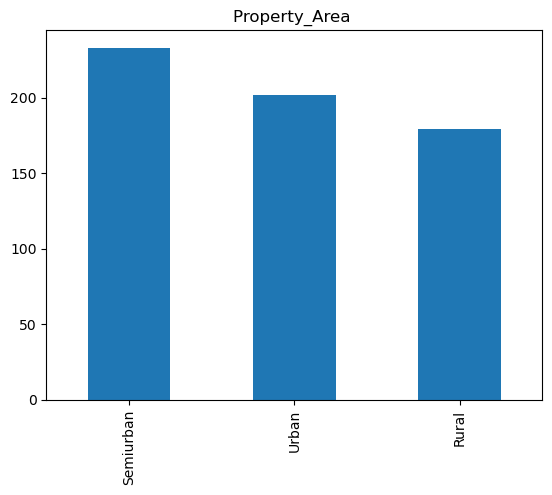

In [15]:
df['Property_Area'].value_counts().plot.bar(title='Property_Area ')

<AxesSubplot:title={'center':'Loan_Status '}>

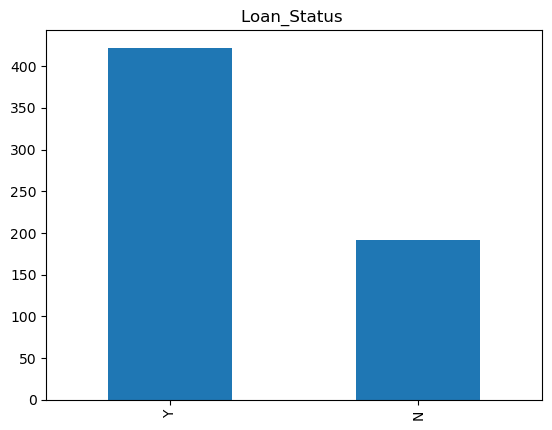

In [16]:
df['Loan_Status'].value_counts().plot.bar(title='Loan_Status ')

### <font color =blue>analyse de fonds </font>

<AxesSubplot:>

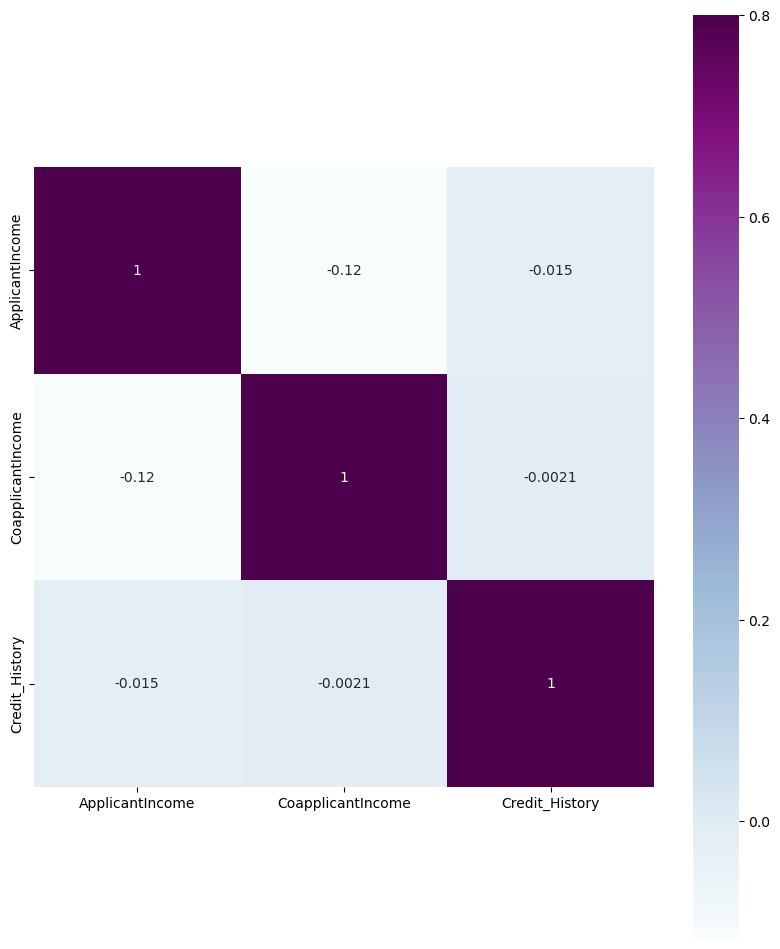

In [17]:

#correlation des variables numérique
matrix=df.corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

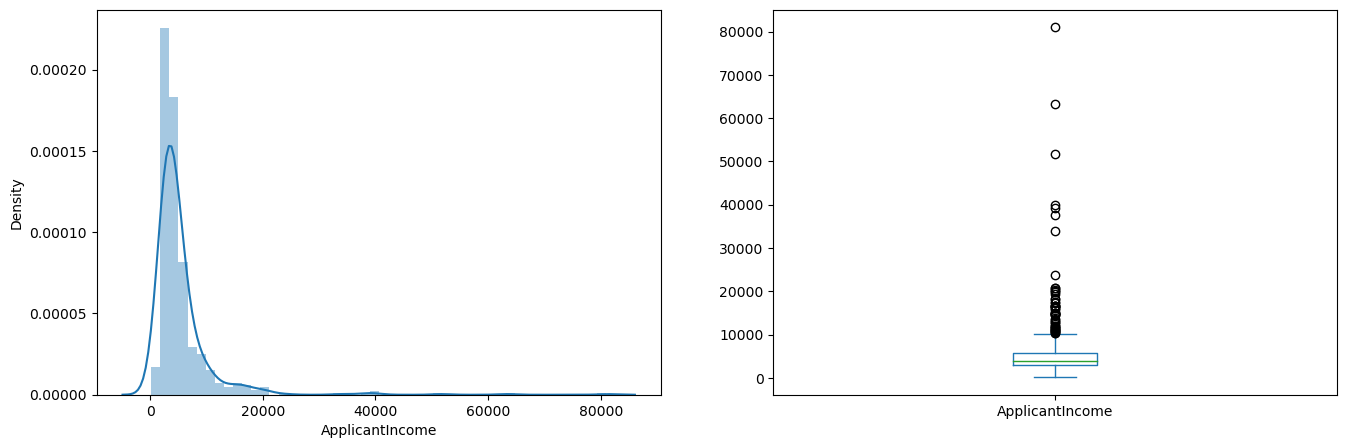

In [18]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()


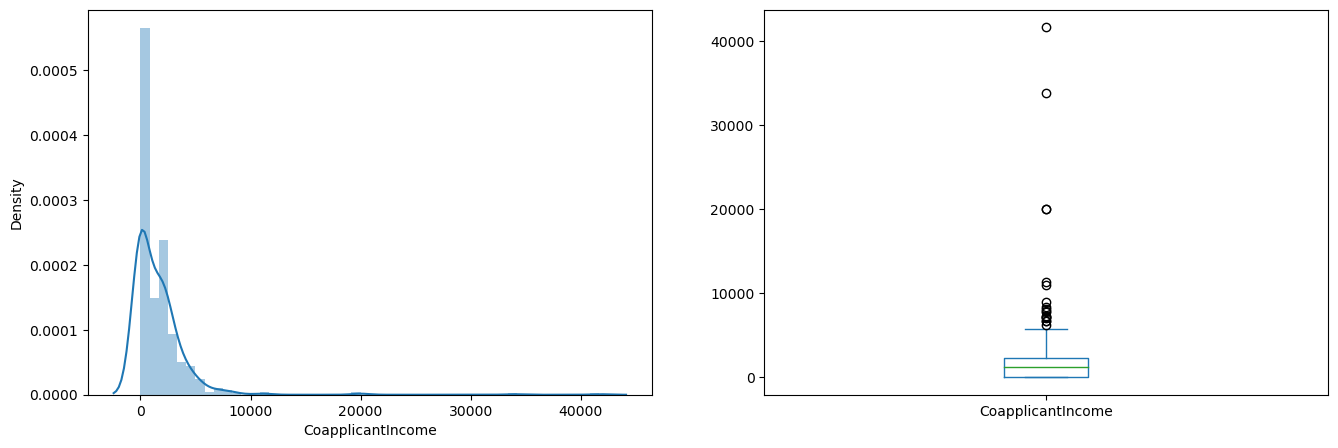

In [19]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

## <font color =green> data preparation </font>

### <font color =blue> remplcer les valeurs manquantes </font>

In [20]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### <font color =blue> corriger les outliers  </font>

In [22]:
# Calcul de Q1, Q3 et IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
IQR
# Calcul des bornes inférieure et supérieure de l'intervalle IQR
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
# I
df.loc[df['CoapplicantIncome'] < borne_inf, 'CoapplicantIncome'] =borne_inf
df.loc[df['CoapplicantIncome'] > borne_sup, 'CoapplicantIncome'] = borne_sup
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,1.0,Urban,Y


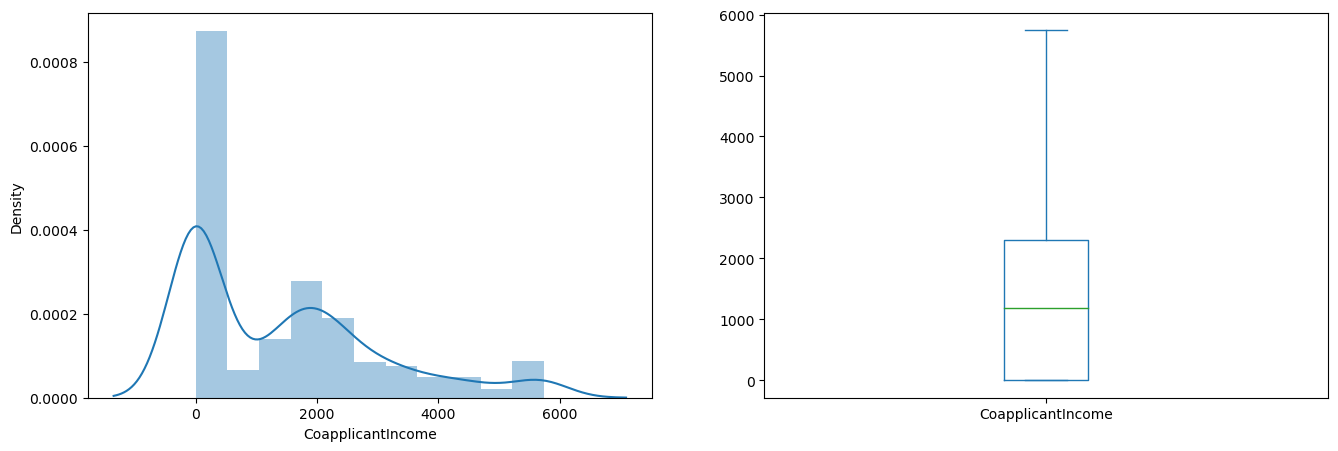

In [23]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

In [24]:
# Calcul de Q1, Q3 et IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des bornes inférieure et supérieure de l'intervalle IQR
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Winsorization
df.loc[df['ApplicantIncome'] < borne_inf, 'ApplicantIncome'] = borne_inf
df.loc[df['ApplicantIncome'] > borne_sup, 'ApplicantIncome'] = borne_sup

df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,1.0,Urban,Y


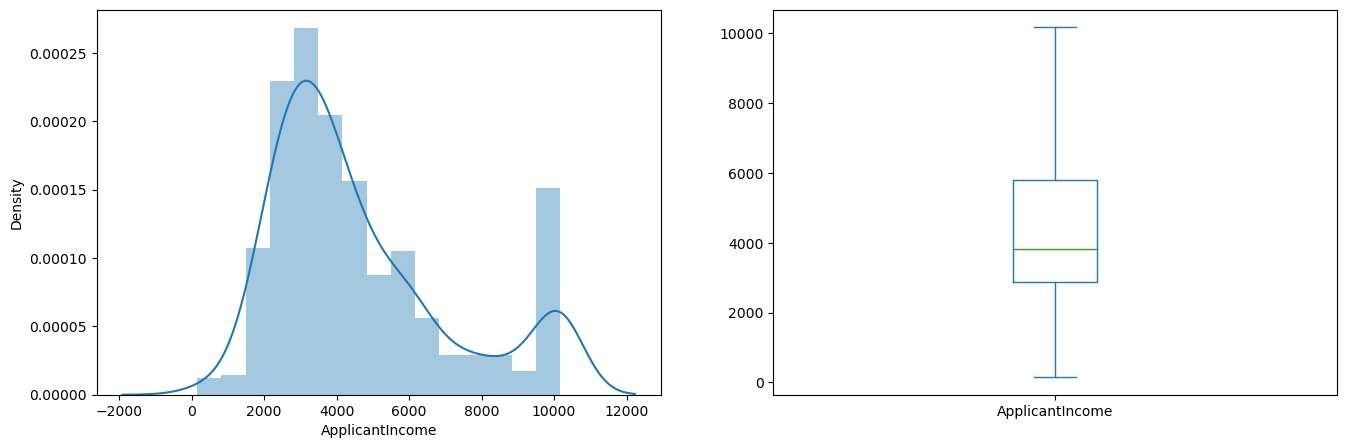

In [25]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

### <font color =blue> l encodage des valeurs nominial </font>

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Credit_History'] = le.fit_transform(df['Credit_History'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,1,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,1,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,1,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,1,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900.0,0.0,1,0,1
610,LP002979,1,1,3,0,0,4106.0,0.0,1,0,1
611,LP002983,1,1,1,0,0,8072.0,240.0,1,2,1
612,LP002984,1,1,2,0,0,7583.0,0.0,1,2,1


In [27]:
df['Loan_Status'].replace(['N','Y'],[0,1],inplace=True)

### <font color =blue> l equilibre de data </font>

In [28]:
X = df.drop('Loan_Status', axis=1)
X = df.drop('Loan_ID', axis=1)
y = df['Loan_Status']
smote = SMOTE()

In [29]:
X_oversampled, y_oversampled = smote.fit_resample(X, y)
oversampled_df = pd.concat([pd.DataFrame(X_oversampled)], axis=1)
oversampled_df.shape

(844, 10)

<AxesSubplot:title={'center':'Loan_Status '}>

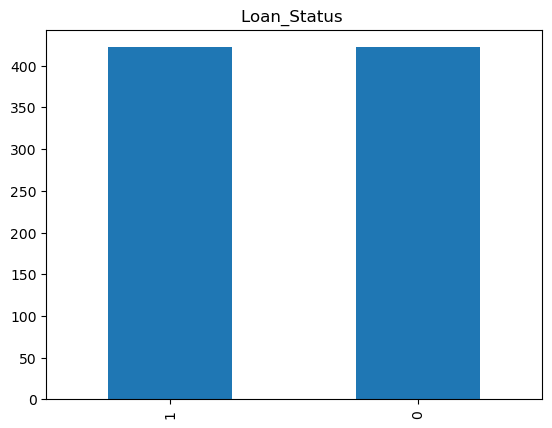

In [61]:
df['Loan_Status'].value_counts().plot.bar(title='Loan_Status ')

In [30]:
df=oversampled_df

In [31]:
df.shape

(844, 10)

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.000000,0.000000,1,2,1
1,1,1,1,0,0,4583.000000,1508.000000,1,0,0
2,1,1,0,0,1,3000.000000,0.000000,1,2,1
3,1,1,0,1,0,2583.000000,2358.000000,1,2,1
4,1,0,0,0,0,6000.000000,0.000000,1,2,1
...,...,...,...,...,...,...,...,...,...,...
839,1,0,0,0,0,10171.250000,0.000000,0,1,0
840,1,0,0,0,0,4781.216221,1809.752132,0,1,0
841,1,1,0,1,0,3052.377960,1760.846577,0,1,0
842,1,0,0,0,0,9025.259698,0.000000,0,2,0


In [33]:
X = df.drop('Loan_Status', axis=1)



In [34]:
#enregistrer le modèle
pickle.dump(X,open('X.pkl','wb'))

In [35]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X

array([[1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.26257482, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.30660078, 0.        ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.29271329, 0.        ,
        0.5       ]])

In [36]:
y = df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

### <font color =blue> la division de data </font>

In [37]:
# spécifier la partie test et la partie train
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

In [38]:
x_train

array([[1.        , 0.        , 0.        , ..., 0.39157685, 0.        ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.41876156, 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.29513549, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.33333333, ..., 0.41366547, 0.        ,
        0.        ]])

In [39]:
y_train

666    0
311    1
801    0
8      1
521    1
      ..
335    1
365    0
618    0
227    1
713    0
Name: Loan_Status, Length: 590, dtype: int32

In [40]:
x_test

array([[1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.66666667, ..., 0.43557216, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.77141604, 0.        ,
        0.        ]])

In [41]:
y_test

190    1
734    0
312    1
300    0
181    0
      ..
747    0
562    1
350    1
331    1
653    0
Name: Loan_Status, Length: 254, dtype: int32

## <font color =green> modeling </font>

### <font color =blue> KNeighborsClassifier</font>

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mcc = matthews_corrcoef(y_test, y_pred)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (exactitude) :", grid_search.best_score_)
print("Coefficient de corrélation de Matthews (MCC) :", mcc)


Meilleurs paramètres : {'n_neighbors': 11}
Meilleur score (exactitude) : 0.7813559322033898
Coefficient de corrélation de Matthews (MCC) : 0.5515259789104578


### <font color =blue> DecisionTreeClassifier</font>

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt


param_grid = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_leaf': [1, 2, 3, 4, 5]}
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']
x_values = list(range(len(params)))


best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Exactitude sur l'ensemble de test :", accuracy)
print("Coefficient de corrélation de Matthews (MCC) sur l'ensemble de test :", mcc)


Exactitude sur l'ensemble de test : 0.7244094488188977
Coefficient de corrélation de Matthews (MCC) sur l'ensemble de test : 0.4532338308457711


### <font color =blue> RandomForestClassifier</font>

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt

param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [1, 2, 3, 4]}
clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']
x_values = list(range(len(params)))
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Meilleurs paramètres :", grid_search.best_params_)
print("accuracy :", accuracy)
print("Coefficient de corrélation de Matthews (MCC) sur l'ensemble de test :", mcc)



Meilleurs paramètres : {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 100}
accuracy : 0.8031496062992126
Coefficient de corrélation de Matthews (MCC) sur l'ensemble de test : 0.6064425446353342


### <font color =blue> LogisticRegression</font>

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
clf = LogisticRegression()
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
clf = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

mcc = matthews_corrcoef(y_test, y_pred)
print("MCC : {:.2f}".format(mcc*100))
recall = recall_score(y_test, y_pred)
print("Rappel : {:.2f}".format(recall))
precision = precision_score(y_test, y_pred)
print("Précision : {:.2f}".format(precision))
f1 = f1_score(y_test, y_pred)
print("Score F1 : {:.2f}".format(f1))

Accuracy : 78.74
MCC : 57.71
Rappel : 0.87
Précision : 0.76
Score F1 : 0.81


### <font color =blue> naive_bayes</font>

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt


param_grid = {}  # Pas de paramètres spécifiques pour Naive Bayes
clf = GaussianNB()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)



print("Exactitude sur l'ensemble de test :", accuracy)
print("Coefficient de corrélation de Matthews (MCC) :", mcc)

Exactitude sur l'ensemble de test : 0.7913385826771654
Coefficient de corrélation de Matthews (MCC) : 0.611191877417172


### <font color =blue> matrice de confusion </font>

In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)


Matrice de confusion :
[[ 72  48]
 [  5 129]]


### <font color =blue> testing</font>

In [55]:
x_train[2]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30077309, 0.        , 0.        , 1.        ])

In [57]:

profil_test=[[0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30077309, 0.        , 0.        , 1.        ]]
best_clf.predict(profil_test)


array([0])

In [58]:
y_train.iloc[2]

0

## <font color =green> deplyoement </font>

In [60]:
#enregistrer le modèle
pickle.dump(best_clf,open('prevision_data.pkl','wb'))